In [1]:
%matplotlib notebook

In [2]:
# import
from owcsimpy.geoobjects.models.typicalsimpleofficeenv_py import TypicalSimpleOfficeEnv_py as TypicalOfficeEnv
from owcsimpy.cir.freqdomaincir import FreqDomainCIR
from owcsimpy.cir.timedomaincir import TimeDomainCIR
from owcsimpy.cir.spheremodelcir import SphereModelCIR
from scipy.constants import speed_of_light
from owcsimpy.cir.cirutils import calcCIRFreqDom_fromMtx
import numpy as np

import matplotlib.pyplot as plt

import mpl_toolkits.mplot3d.art3d as art3d

from JSAnimation.IPython_display import display_animation
from matplotlib import animation

from owcsimpy.geoutils.mobility import getArrayMobility 

roomLength,roomWidth,roomHeight=4,3,3

# Introduction

In this notebook, we will play around with random mobility and orientation of a UE. 

While random mobility package is taken from [1], the random orientation model will be based on my own paper [2].

There are three random mobility models that are focus on this notebook, i.e., random waypoint ('rwp'), random direction ('rd'), and the truncated Levy-walk models ('lw'). A harmonic random process, i.e., sinusoids with random phase in white noise, is used to model the random orientation. More detail explanations can be found in [2].

References:

[1] https://github.com/panisson/pymobility

[2] A. A. Purwita, M. D. Soltani, M. Safari and H. Haas, "Terminal Orientation in OFDM-Based LiFi Systems," in IEEE Transactions on Wireless Communications, vol. 18, no. 8, pp. 4003-4016, Aug. 2019.



# Simple Office Environment with Mobility

As an example, let's generate an instance of a simple office environment with the following details.

The human walks while reading through his LiFi-enabled UE. The furnitures (a desk and a chair) face the y-z plane at x = 0.

<IPython.core.display.Javascript object>


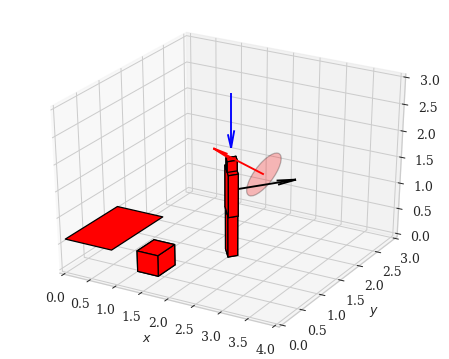

In [3]:
position, furnitureConfig, humanLoc, humanDirection, activity = \
    'standing','cornerYFacingWall',[roomLength/2,roomWidth/2],np.deg2rad(45),'reading'

office = TypicalOfficeEnv(
    roomDim=[roomLength,roomWidth,roomHeight],
    humanLoc=humanLoc,humanDirection=humanDirection,
    mode='rx',
    activity=activity,
    position=position,
    furnitureConfig=furnitureConfig
)

fig,ax = office.draw();
fig.set_size_inches(5, 4)

## Standing

<IPython.core.display.Javascript object>


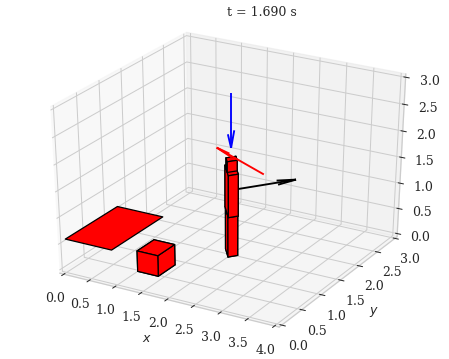

(2000,)


In [4]:
activity = 'standing'
minSamples = 2000; # 1 sample = 1 ms for activity = 'standing'
traj = getArrayMobility(activity = 'standing',minSamples=minSamples)

arrayLoc = traj.get('arrayLoc')
arrayVel = traj.get('arrayVel')
arrayTime = traj.get('arrayTime')
arrayDir = traj.get('arrayDir')
arrayTheta0 = traj.get('arrayTheta0')
arrayOmega0 = traj.get('arrayOmega0')

# farrayLoc, arrayVel, and arrayDir are empty lists if activity = 'standing'
arrayLoc = np.ones((minSamples,2))*office.human.ctrPoint[0:2] # static
arrayVel = np.zeros((minSamples,)) # zero velocity
arrayDir = np.ones((minSamples,))*humanDirection # static direction


# Since the time resolution is 1 ms, we need to slice it so that the animation won't take too long
numSlice = 10 # in the order of (1 -> 1 ms, 10 -> 10 ms, etc.) 

arrayLocSliced = arrayLoc[0::numSlice]
arrayVelSliced = arrayVel[0::numSlice]
arrayTimeSliced = arrayTime[0::numSlice]
arrayDirSliced = arrayDir[0::numSlice]
arrayTheta0Sliced = arrayTheta0[0::numSlice]
arrayOmega0Sliced = arrayOmega0[0::numSlice]


fig,ax,anim = office.getAnimation(
    arrayLocSliced,arrayDirSliced,arrayTheta0Sliced,arrayOmega0Sliced,arrayTimeSliced,interval=1)
fig.set_size_inches(5, 4)

# display_animation(anim, default_mode='loop') # get the player's pannels
# anim.save('basic_animation.gif',  writer='imagemagick') # save it to a file

print(arrayTheta0.shape)

## RWP

<IPython.core.display.Javascript object>


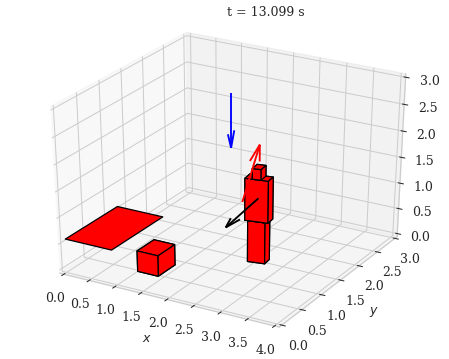

(35040, 2)


In [5]:
randomMobModel = 'rwp'
activity = 'walking'
dimensions = (roomLength-0.2,roomWidth-0.2)
velocityMinMax = (0.1,0.8)
waitTimeMax = 0.5
excludedArea = 1.8
traj = getArrayMobility(
    randomMobModel=randomMobModel,
    activity=activity,
    dimensions=dimensions,
    velocityMinMax=velocityMinMax,
    waitTimeMax=waitTimeMax,
    excludedArea=excludedArea)

arrayLoc = traj.get('arrayLoc')
arrayVel = traj.get('arrayVel')
arrayTime = traj.get('arrayTime')
arrayDir = traj.get('arrayDir')
arrayTheta0 = traj.get('arrayTheta0')
arrayOmega0 = traj.get('arrayOmega0')

# Since the time resolution is 1 ms, we need to slice it so that the animation won't take too long
numSlice = 100 # in the order of (1 -> 1 ms, 10 -> 10 ms, etc.) 

arrayLocSliced = arrayLoc[0::numSlice]
arrayVelSliced = arrayVel[0::numSlice]
arrayTimeSliced = arrayTime[0::numSlice]
arrayDirSliced = arrayDir[0::numSlice]
arrayTheta0Sliced = arrayTheta0[0::numSlice]
arrayOmega0Sliced = arrayOmega0[0::numSlice]


fig,ax,anim = office.getAnimation(
    arrayLocSliced,arrayDirSliced,arrayTheta0Sliced,arrayOmega0Sliced,arrayTimeSliced,interval=1)
fig.set_size_inches(5, 4)

# display_animation(anim, default_mode='loop') # get the player's pannels
# anim.save('basic_animation.gif',  writer='imagemagick') # save it to a file

print(arrayLoc.shape)

## RD

<IPython.core.display.Javascript object>


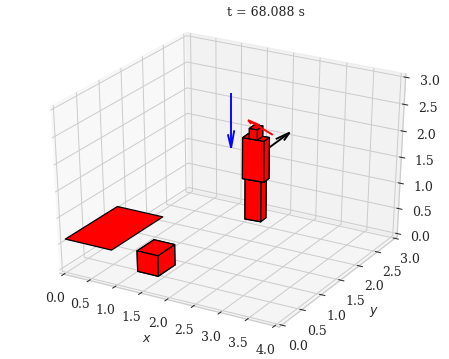

(72221, 2)


In [6]:
randomMobModel = 'rd'
activity = 'walking'
dimensions = (roomLength-0.2,roomWidth-0.2)
velocityMinMax = (0.1,0.8)
waitTimeMax = 0.5
excludedArea = 1.8
traj = getArrayMobility(
    randomMobModel=randomMobModel,
    activity=activity,
    dimensions=dimensions,
    velocityMinMax=velocityMinMax,
    waitTimeMax=waitTimeMax,
    excludedArea=excludedArea)

arrayLoc = traj.get('arrayLoc')
arrayVel = traj.get('arrayVel')
arrayTime = traj.get('arrayTime')
arrayDir = traj.get('arrayDir')
arrayTheta0 = traj.get('arrayTheta0')
arrayOmega0 = traj.get('arrayOmega0')

# Since the time resolution is 1 ms, we need to slice it so that the animation won't take too long
numSlice = 100 # in the order of (1 -> 1 ms, 10 -> 10 ms, etc.) 

arrayLocSliced = arrayLoc[0::numSlice]
arrayVelSliced = arrayVel[0::numSlice]
arrayTimeSliced = arrayTime[0::numSlice]
arrayDirSliced = arrayDir[0::numSlice]
arrayTheta0Sliced = arrayTheta0[0::numSlice]
arrayOmega0Sliced = arrayOmega0[0::numSlice]


fig,ax,anim = office.getAnimation(
    arrayLocSliced,arrayDirSliced,arrayTheta0Sliced,arrayOmega0Sliced,arrayTimeSliced,interval=1)
fig.set_size_inches(5, 4)

# display_animation(anim, default_mode='loop') # get the player's pannels
# anim.save('basic_animation.gif',  writer='imagemagick') # save it to a file


print(arrayLoc.shape)

# LW

<IPython.core.display.Javascript object>


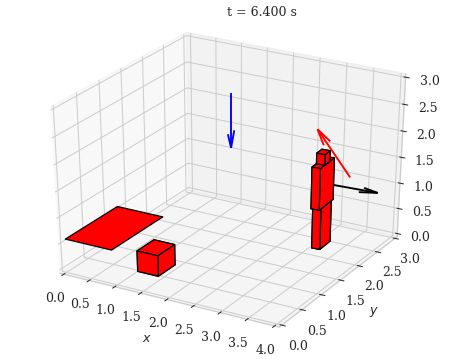

(37838, 2)


In [7]:
randomMobModel = 'lw'
activity = 'walking'
dimensions = (roomLength-0.2,roomWidth-0.2)
velocityMinMax = (0.1,0.8)
waitTimeMax = 0.5
excludedArea = 1.8
traj = getArrayMobility(
    randomMobModel=randomMobModel,
    activity=activity,
    dimensions=dimensions,
    velocityMinMax=velocityMinMax,
    waitTimeMax=waitTimeMax,
    excludedArea=excludedArea)

arrayLoc = traj.get('arrayLoc')
arrayVel = traj.get('arrayVel')
arrayTime = traj.get('arrayTime')
arrayDir = traj.get('arrayDir')
arrayTheta0 = traj.get('arrayTheta0')
arrayOmega0 = traj.get('arrayOmega0')

# Since the time resolution is 1 ms, we need to slice it so that the animation won't take too long
numSlice = 200 # in the order of (1 -> 1 ms, 10 -> 10 ms, etc.) 

arrayLocSliced = arrayLoc[0::numSlice]
arrayVelSliced = arrayVel[0::numSlice]
arrayTimeSliced = arrayTime[0::numSlice]
arrayDirSliced = arrayDir[0::numSlice]
arrayTheta0Sliced = arrayTheta0[0::numSlice]
arrayOmega0Sliced = arrayOmega0[0::numSlice]


fig,ax,anim = office.getAnimation(
    arrayLocSliced,arrayDirSliced,arrayTheta0Sliced,arrayOmega0Sliced,arrayTimeSliced,interval=1)
fig.set_size_inches(5, 4)

# display_animation(anim, default_mode='loop') # get the player's pannels
# anim.save('basic_animation.gif',  writer='imagemagick') # save it to a file

print(arrayLoc.shape)